This notebook is used to figure out the right values for the logistic growth curve that describes how quickly we can build seaweed farms in a nuclear winter. 

In [1]:
import math
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(42)
np.random.seed(42)

plt.style.use(
    "https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle"
)

To be able to create a curve that models the scale up of the seaweed farm production, we first have to find numbers to anchor us on. Globally, around suitable 50 Million tons per year of synthetic fiber suitable for rope production are produced. To create 1 km² of seaweed farm in a low tech set up we need ~ 33.9 tons of suitable rope (this number is based on the rope lengths mentioned [here](https://elibrary.worldbank.org/doi/abs/10.1596/24919) times the density of rope for seaweed production, which is somewhere between 0.025 and 0.11 kg per m). This means, if we use all suitable syntetic fiber, we can build around 4000 km² of seaweed farm per day. We can focus only on the rope, because all other parts of a low tech seaweed farm can be build without industrial capacity.

In [2]:
thin_rope_per_km2 = 665.3 # km (seedling lines)
thick_rope_per_km2 = 153.3 # km (long lines)
thin_rope_density = 0.025 # kg/m
thick_rope_density = 0.111 # kg/m
thick_rope_weight_per_km2 = thick_rope_per_km2 * thick_rope_density  # kg/km2
thin_rope_weight_per_km2 = thin_rope_per_km2 * thin_rope_density  # kg/km2
total_rope_weight_per_km2 = thick_rope_weight_per_km2 + thin_rope_weight_per_km2 # kg/km2
total_rope_weight_per_km2 # kg/km2

33.6488

In [3]:
fiber_per_year = 50000000 # tons
area_per_year = fiber_per_year / total_rope_weight_per_km2 # km2
area_per_day = area_per_year / 365 # km2/day
area_per_day

4071.0605242939723

This number shows us the amount of seaweed farms we could build per day, if we convert all suitable fibers into ropes. While this is theoretically possible, the current amount of rope produced is much lower and we therefore have to scale up the production capacity of rope to make up for the differences. For this analysis we assume the amount of fiber produced to be fixed, as it has a much more complicated production process than the ropes themselves. Given a [typical production capacity](https://www.robco-eng.com/) and [price](https://www.alibaba.com/product-detail/High-speed-CNC-full-automatic-plastic_60631477189.html) we can estimate that we need roughly need rope twisting machines with a total value of 50 Billion $ to produce enough ropes to be able to build around 4000 km² per day. This is comparatively little money needed, so we can assume that those ressources will be provided for. 

The next step is to estimate how quickly this scale up could happen. The best comparison class for such a quick scale up is the shift of the American automobile in the Second World War from cars to aircraft. From the [available literature](https://books.google.de/books/about/Freedom_s_Arsenal.html?id=jjIdAQAAMAAJ&redir_esc=y) we can see that such a massive switch can happen in around 9 months. Therefore, we can assume that after 9 months we can reach our maximum daily of 4000 km² per day. Those numbers also show that after 6 months 2/3 of the total production capacity where reached and around 1/6 after 3 months. Given those numbers, we can fit a logistic growth curve. We are using logistic growth, as it describes well how the build up to a specific production capacity usually works. 

In [4]:
def logistic_curve(x, max_L, k, x0, off):
    """
    Describes a logistic growth curve
    see for example:
    https://stackoverflow.com/questions/60160803/scipy-optimize-curve-fit-for-logistic-function
    Arguments:
        x: value to calculate
        max_L: maximum value of the curve
        k: the logistic growth rate
        x0: the sigmoid's midpoint
        off: offset to 0
    Returns
        float: y value corresponding to x
    """
    return max_L / (1 + np.exp( - k * (x - x0))) + off

In [5]:
# Data
x = [1, 90, 180, 270, 300] # days
y = [1, 500, 2666, area_per_day, area_per_day] # amount farms build km²

In [6]:
popt, _ = curve_fit(logistic_curve, x,y, p0=[area_per_day, 0.5, 150, 50])
popt

/tmp/ipykernel_27824/4083925904.py:15: RuntimeWarning: overflow encountered in exp
  return max_L / (1 + np.exp( - k * (x - x0))) + off


array([ 4.23911022e+03,  2.80747948e-02,  1.59342140e+02, -4.07073394e+01])

In [7]:
x_sim = np.linspace(0,300,10000)
y_sim = [logistic_curve(i, popt[0], popt[1], popt[2], popt[3]) for i in x_sim]

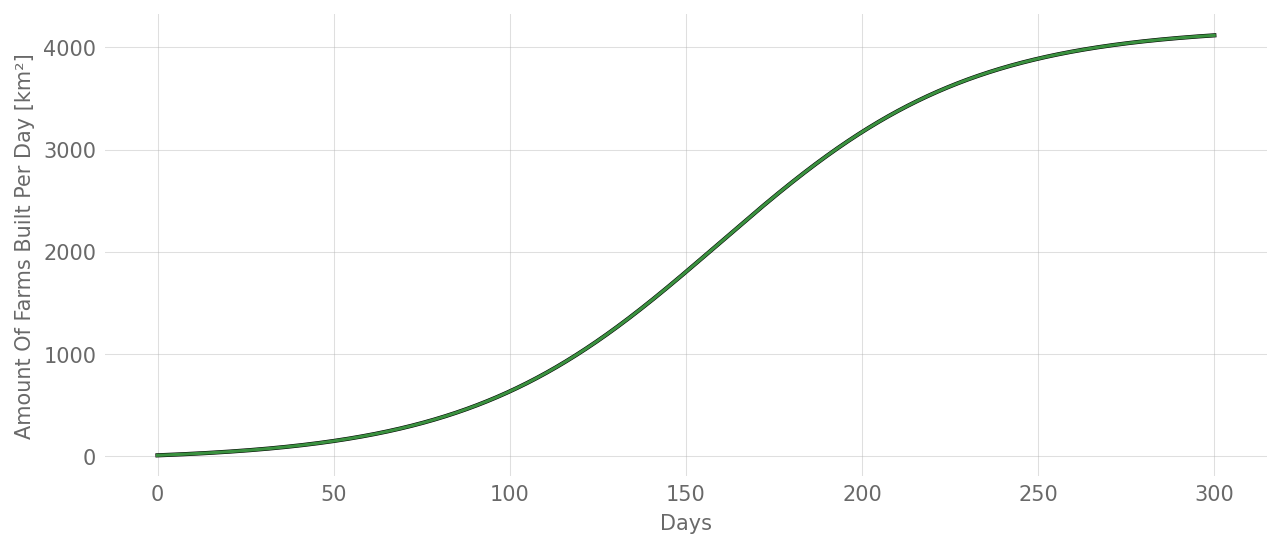

In [8]:
plt.plot(x_sim, y_sim, linewidth=2, color="black")
plt.plot(x_sim, y_sim, linewidth=1.5)
ax = plt.gca()
ax.set_ylabel("Amount Of Farms Built Per Day [km²]")
ax.set_xlabel("Days")
plt.savefig("../results/logistic_growth.png", dpi=300)

This is the resulting scale-up curve for the production capacity needed to produce the material needed for seaweed production. We are assuming that the distribution and installation of the ropes will be no problem, as the overall production output of the US in the Second World War was considerably higher, but logistics and distribution weren't a bottleneck. 